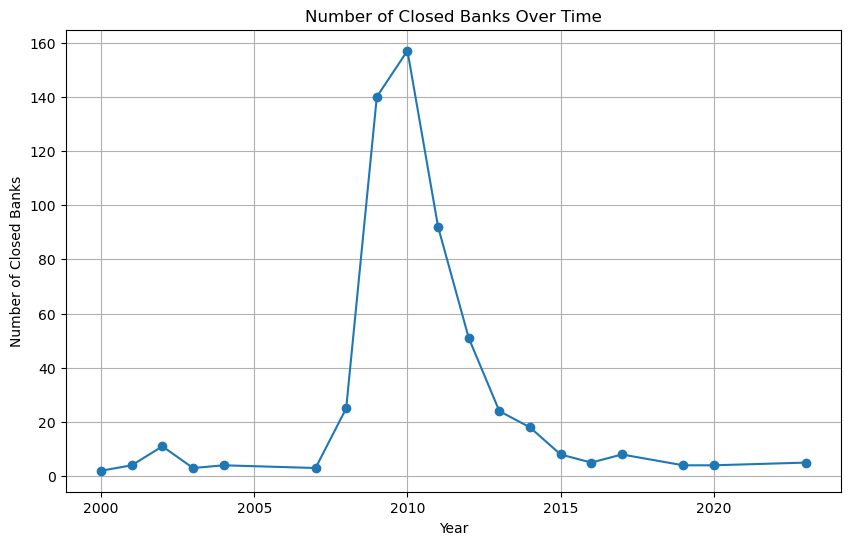

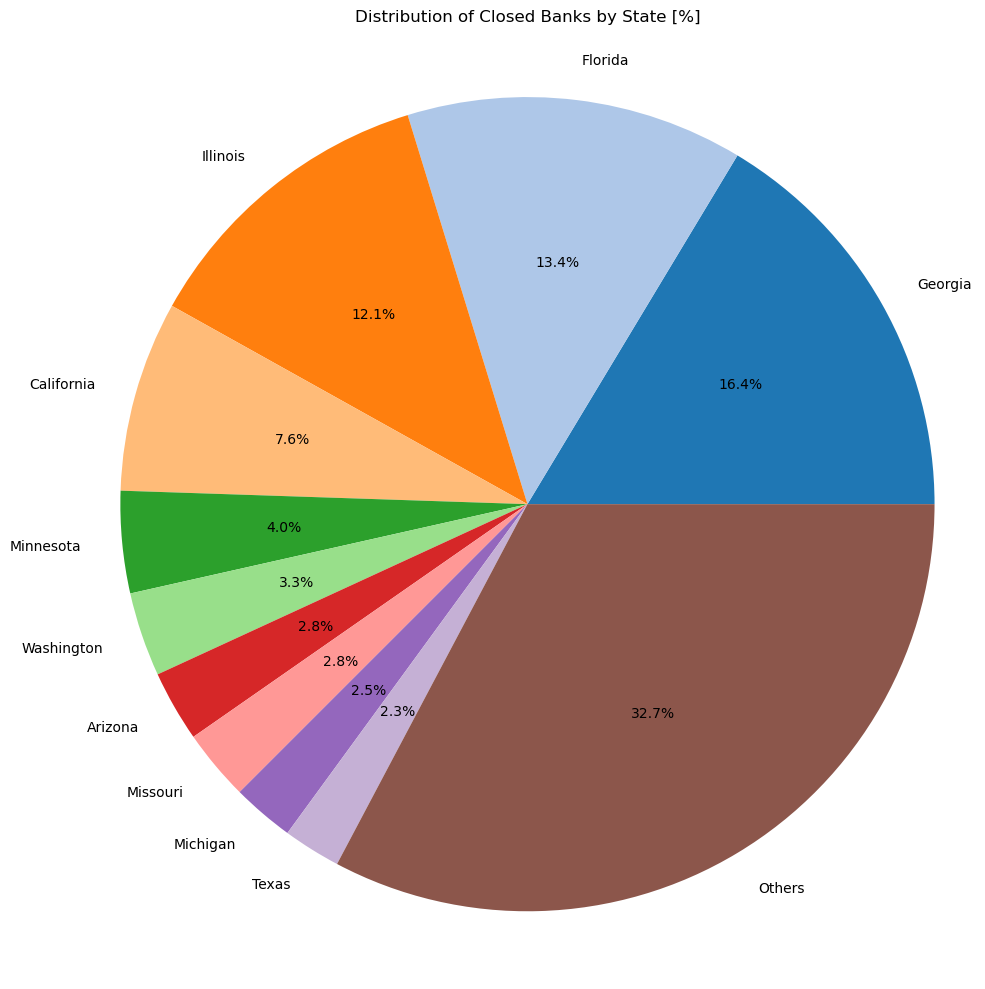

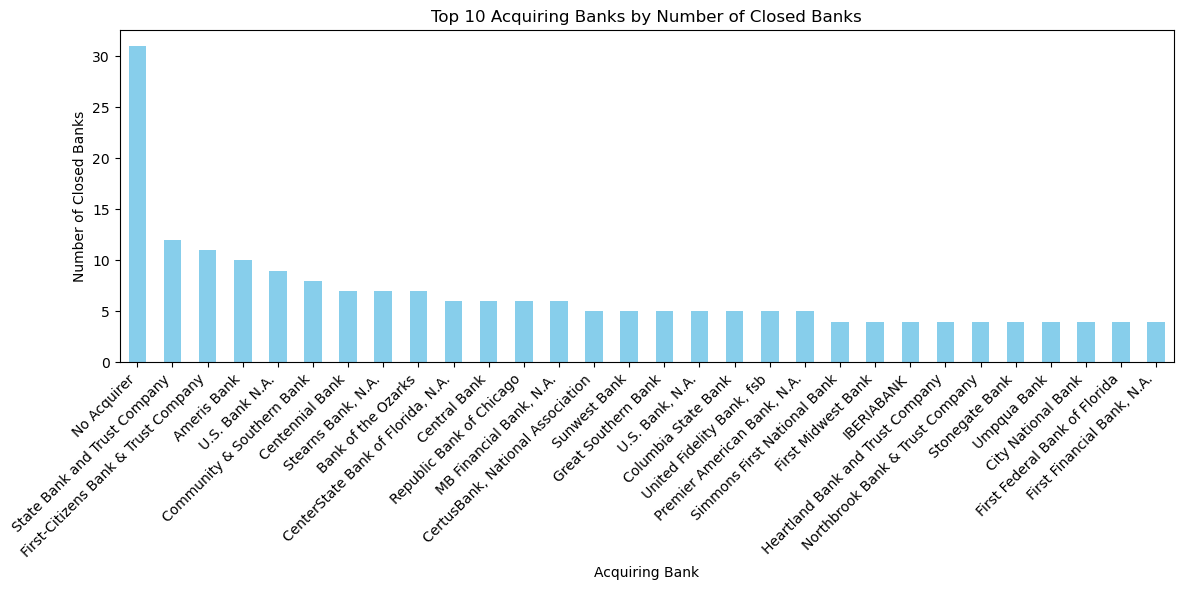

In [72]:
import matplotlib.pyplot as plt
import pandas as pd

class Visualization:
    """
    A class to visualize data related to closed banks.
    
    Attributes:
        None
    
    Methods:
        number_of_closed_banks(): Plots the number of closed banks over time.
        banks_closed_per_state(): Visualizes the distribution of closed banks by state.
        banks_closed_per_acquiring_institution(): Shows the top acquiring banks by number of closed banks.
    """

    def __init__(self):
        """
        Initializes the Visualization class.
        """
        pass

    def number_of_closed_banks(self):
        """
        Plots the number of closed banks over time.
        
        This method loads a dataset of closed banks, converts the 'Closing Date' to datetime format,
        groups the data by year, and counts the number of closures per year. It then plots these counts
        over time.
        """
        # Load the dataset
        e = extract()
        date_closed_banks = e.fromCSV(file_path='data/banklist_date_closed_banks.csv')

        # Convert the list of dictionaries to a DataFrame for easier manipulation
        df = pd.DataFrame(date_closed_banks)

        # Convert the 'Closing Date' column to datetime format
        df['Closing Date'] = pd.to_datetime(df['Closing Date'], format='%d-%b-%y')

        # Group by year and count the number of closures
        df['Year'] = df['Closing Date'].dt.year
        closures_by_year = df.groupby('Year').size().reset_index(name='Count')

        # Plotting
        plt.figure(figsize=(10, 6))
        plt.plot(closures_by_year['Year'], closures_by_year['Count'], marker='o')
        plt.xlabel('Year')
        plt.ylabel('Number of Closed Banks')
        plt.title('Number of Closed Banks Over Time')
        plt.grid(True)
        plt.show()

    def banks_closed_per_state(self):
        """
        Visualizes the distribution of closed banks by state.
        
        This method loads a dataset of closed banks, sorts the states by the number of closures,
        selects the top 10 states, and calculates the percentage of closures for each state. It then
        plots these percentages in a pie chart.
        """
        # Load the dataset
        e = extract()
        state_closed_banks = e.fromCSV(file_path='data/banklist_state_closed_banks.csv')

        # Convert the list of dictionaries to a DataFrame for easier manipulation
        df = pd.DataFrame(state_closed_banks)

        # Sort by count in descending order (most frequent states first)
        state_counts = df['State Name'].value_counts().sort_values(ascending=False)

        # Select the top 10 states
        top_10_states = state_counts.head(10)

        # Calculate the total count excluding the top 10 states
        others_count = state_counts.iloc[10:].sum()

        # Combine the remaining states into a single category named "Others"
        state_counts = pd.concat([top_10_states, pd.Series([others_count], index=['Others'])])

        # Calculate total number of banks
        total_banks = df.shape[0]

        # Calculate percentages for each state (including "Others")
        state_percentages = (state_counts / total_banks) * 100

        # Plotting pie chart
        plt.figure(figsize=(10, 10))  
        state_percentages.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.tab20.colors) 
        plt.axis('equal')  
        plt.title(f"Distribution of Closed Banks by State [%]")
        plt.ylabel('') 
        plt.tight_layout()
        plt.show()

    def banks_closed_per_acquiring_institution(self):
        """
        Shows the top acquiring banks by number of closed banks.
        
        This method loads a dataset of closed banks, counts the number of closures per acquiring institution,
        and selects the top 10 acquiring institutions. It then plots these counts in a bar chart.
        """
        # Load the dataset
        e = extract()
        acquiring_closed_banks = e.fromCSV(file_path='data/banklist_acquiring_closed_banks.csv')

        # Convert the list of dictionaries to a DataFrame for easier manipulation
        df = pd.DataFrame(acquiring_closed_banks)

        # Show only the top 10 acquiring banks
        acquiring_counts = df['Acquiring Institution'].value_counts().head(30)

        plt.figure(figsize=(12, 6)) 
        acquiring_counts.plot(kind='bar', color='skyblue')
        plt.xlabel('Acquiring Bank')
        plt.ylabel('Number of Closed Banks')
        plt.title('Top 10 Acquiring Banks by Number of Closed Banks')
        plt.xticks(rotation=45, ha='right')  
        plt.tight_layout()
        plt.show()

# Initialize the Visualization class and call its methods
v = Visualization()
v.number_of_closed_banks()
v.banks_closed_per_state()
v.banks_closed_per_acquiring_institution()
